---
title: "Data Visualization Final Project"
author: "Daniel Kang"
date: "December 15, 2025"
format:
  html:
    toc: true
    theme: yeti
    code-fold: false
    smooth-scroll: true
---

## Dataset
- World Bank World Development Indicators (WDI)
    - Physicians per 1,000 people (SH.MED.PHYS.ZS)
    - Hospital beds per 1,000 people (SH.MED.BEDS.ZS)
    - Life expectancy at birth (SP.DYN.LE00.IN)
    - World Bank regions

## Research Question
How do differences in healthcare infrastructure across countries relate to variation in life expectancy over time?

## Objective
- Examine the relationship between health system capacity and life expectancy
- Compare patterns across world regions
- Assess limitations of cross-national health comparisons

## Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
np.random.seed(42)

In [2]:
physicians = pd.read_csv("/Users/danielkang/Downloads/projects/Final_Project/data/API_SH.MED.PHYS.ZS_DS2_en_csv_v2_110369.csv", skiprows=4)
beds = pd.read_csv("/Users/danielkang/Downloads/projects/Final_Project/data/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_110709.csv", skiprows=4)
life_exp = pd.read_csv("/Users/danielkang/Downloads/projects/Final_Project/data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_110210.csv", skiprows=4)
regions = pd.read_csv("/Users/danielkang/Downloads/projects/Final_Project/data/Metadata_Country_API_SP.DYN.LE00.IN_DS2_en_csv_v2_110210.csv")

In [3]:
year = "2019"

def tidy_indicator(df, value_name):
    return (
        df[["Country Name", "Country Code", year]]
        .rename(columns={year: value_name})
    )

In [4]:
phys = tidy_indicator(physicians, "physicians_per_1000")
beds = tidy_indicator(beds, "beds_per_1000")
life = tidy_indicator(life_exp, "life_expectancy")

In [5]:
health = (
    phys
    .merge(beds, on=["Country Name", "Country Code"], how="inner")
    .merge(life, on=["Country Name", "Country Code"], how="inner")
    .merge(
        regions[["Country Code", "Region"]],
        on="Country Code",
        how="left"
    )
    .dropna()
)

In [6]:
health.head()

,Country Name,Country Code,physicians_per_1000,beds_per_1000,life_expectancy,Region
2,Afghanistan,AFG,0.2140,0.38,62.941000,Middle East & North Africa
5,Albania,ALB,1.6510,2.85,79.467000,Europe & Central Asia
8,United Arab Emirates,ARE,2.7590,1.87,82.596000,Middle East & North Africa
9,Argentina,ARG,4.0685,3.71,76.847000,Latin America & Caribbean
10,Armenia,ARM,3.1170,4.18,76.221951,Europe & Central Asia


## Distribution of Health System Capacity

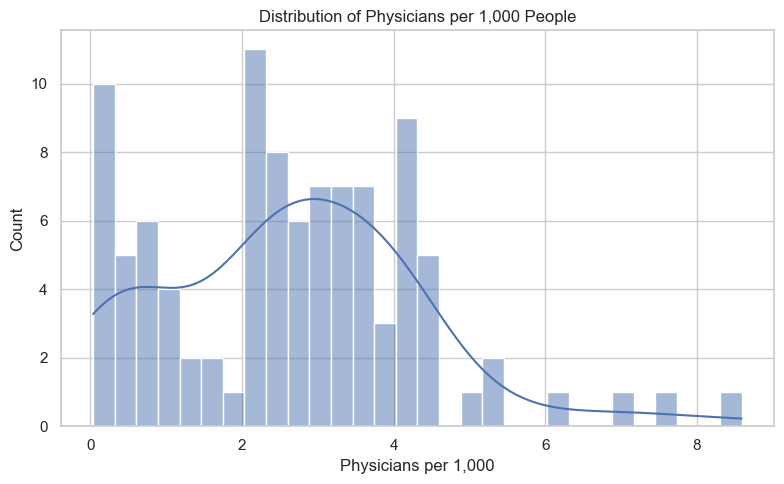

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(
    health["physicians_per_1000"],
    bins=30,
    kde=True
)
plt.title("Distribution of Physicians per 1,000 People")
plt.xlabel("Physicians per 1,000")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Regional Comparison: Physicians per Capita

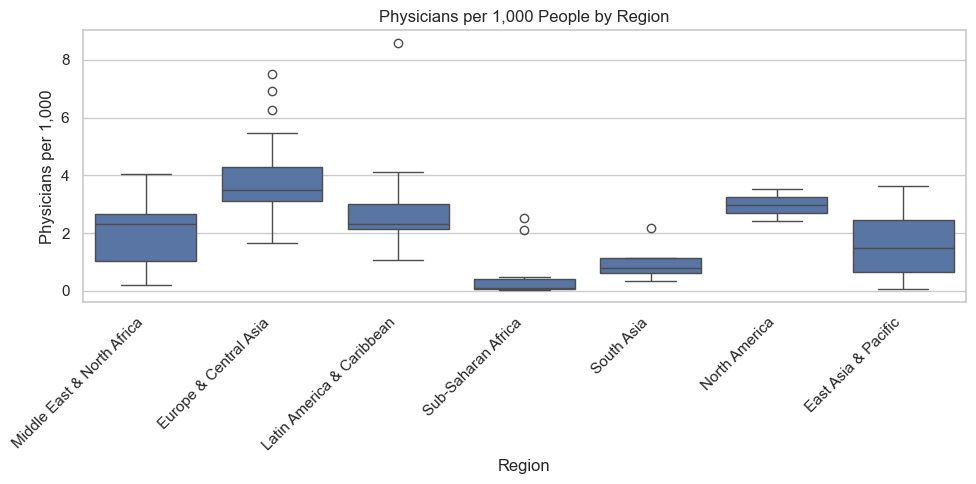

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=health,
    x="Region",
    y="physicians_per_1000"
)
plt.xticks(rotation=45, ha="right")
plt.title("Physicians per 1,000 People by Region")
plt.xlabel("Region")
plt.ylabel("Physicians per 1,000")
plt.tight_layout()
plt.show()

## Health System Capacity vs Life Expectancy

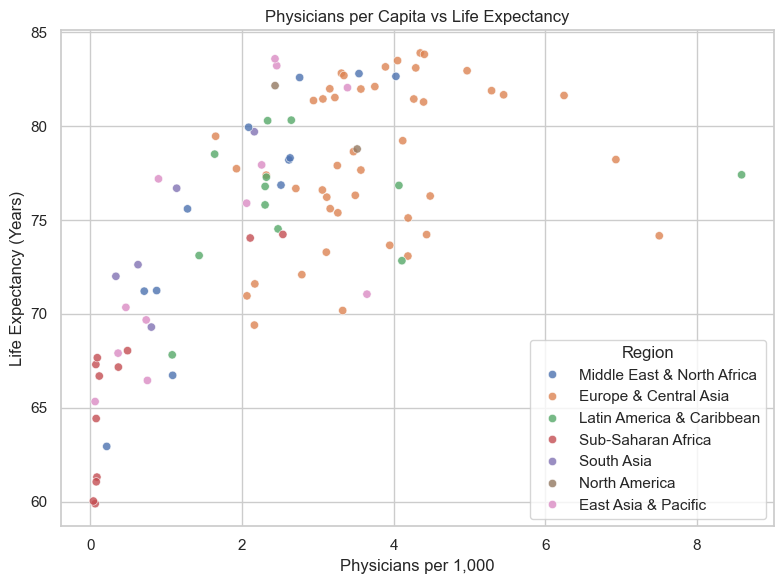

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=health,
    x="physicians_per_1000",
    y="life_expectancy",
    hue="Region",
    alpha=0.8
)
plt.title("Physicians per Capita vs Life Expectancy")
plt.xlabel("Physicians per 1,000")
plt.ylabel("Life Expectancy (Years)")
plt.tight_layout()
plt.show()

## Correlation Matrix

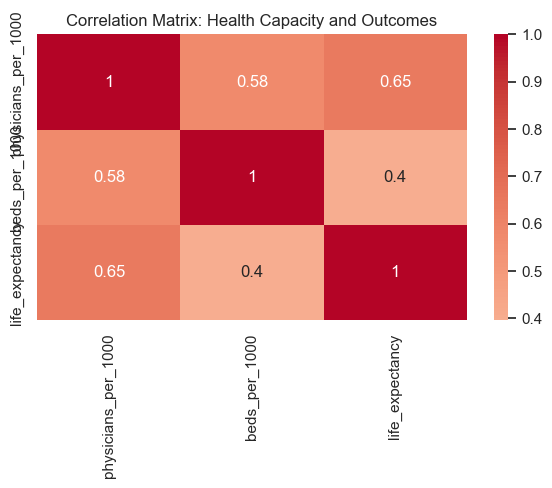

In [10]:
corr = (
    health[["physicians_per_1000", "beds_per_1000", "life_expectancy"]]
    .corr()
)

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix: Health Capacity and Outcomes")
plt.tight_layout()
plt.show()

## Regional Means with Uncertainty

In [11]:
summary = (
    health
    .groupby("Region")["life_expectancy"]
    .agg(["mean", "count", "std"])
    .assign(se=lambda d: d["std"] / np.sqrt(d["count"]))
    .reset_index()
)

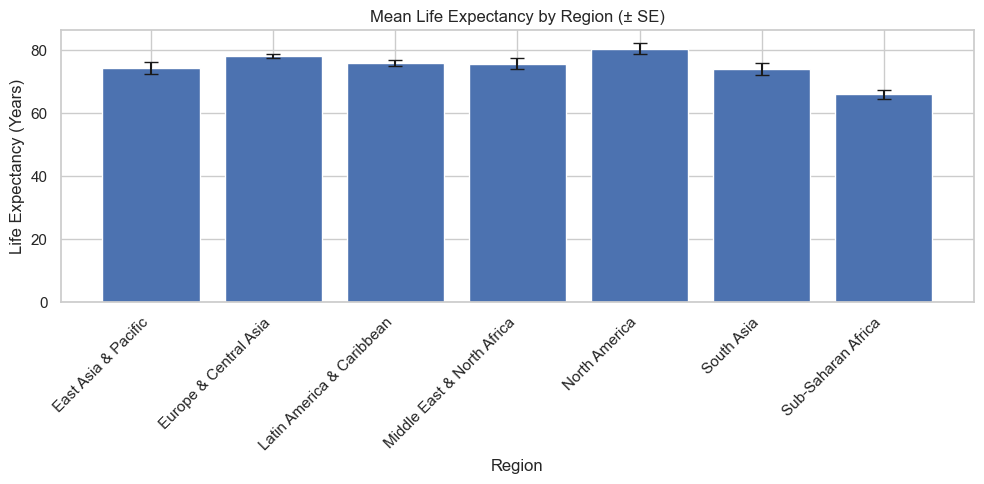

In [12]:
plt.figure(figsize=(10,5))
plt.bar(
    summary["Region"],
    summary["mean"],
    yerr=summary["se"],
    capsize=5
)
plt.xticks(rotation=45, ha="right")
plt.title("Mean Life Expectancy by Region (± SE)")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

## Reflection

> Health system capacity, as measured by physician and hospital bed availability, shows a clear but imperfect relationship with life expectancy across countries. Regions with higher physician density generally exhibit longer life expectancy, supporting the intuitive link between access to medical care and population health outcomes. However, substantial dispersion within regions indicates that capacity alone does not fully determine health performance. Countries with similar numbers of physicians per capita can differ markedly in life expectancy, reflecting the influence of additional factors such as public health infrastructure, income, education, and inequality.
>
> The correlation analysis confirms a moderate positive association between health system inputs and life expectancy, but the relationships are not sufficiently strong to imply direct causality. Regional averages with uncertainty further illustrate that while high-income regions cluster at higher life expectancy levels, overlapping error bars suggest that cross-region differences should be interpreted cautiously. These findings highlight the limitations of simple cross-national comparisons and underscore the importance of contextual and institutional factors when evaluating health outcomes. Visualization plays a crucial role in revealing both general trends and their exceptions, enabling a more nuanced understanding of global health disparities.